In [1]:
import numpy as np
import imageio
import koder 
import dekoder

In [2]:
#obsługa kodera
boats = imageio.imread("boats.png")
predykcja=koder.pred(boats)
wielkosc_w=len(predykcja)
wielkosc_h=len(predykcja[0])
jaki_symbol,ile_wystąpien=koder.symbole_ksiazka(predykcja)  
prawdopodobienstwo_book=koder.ksiazka_prawdopodobienst(jaki_symbol,ile_wystąpien)
tree=koder.xHuffTree(prawdopodobienstwo_book,koder.liczba_symboli_calkowita(ile_wystąpien))
ksiazka=koder.HuffmanCodeBook(tree.Value)
tab=predykcja.flatten()
kod=koder.kodowanie(tab,ksiazka)
znaki,temp,bity=koder.ksiazka_bit(ksiazka)
x_h,y_h=koder.podziel(wielkosc_h)
x_w,y_w=koder.podziel(wielkosc_w)
ciag_plik=bytearray()
ciag_plik=koder.zapis_do_pliku_rozmiaru(x_h,y_h,x_w,y_w)
ciag_plik.append(len(znaki))
ciag_plik=ciag_plik+koder.dopisz_ksiazke(znaki,temp,bity)
ciag_plik=ciag_plik+koder.HuffmanCodeZapis(kod)
koder.zapis_pliku(ciag_plik)

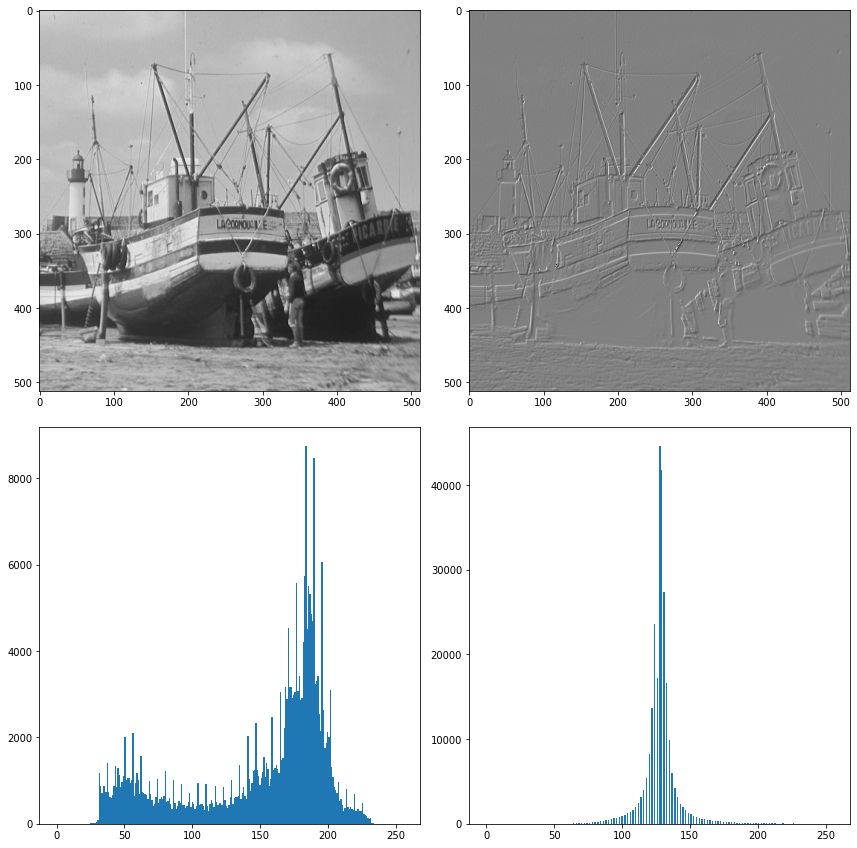

In [3]:
#obsługa dekodera
data=bytearray()
data=data+dekoder.odczyt() 
data,cw=dekoder.wielkosc(data)  
odzyskana_h,odzyskana_w=dekoder.pelna_skala(cw)
znak,kod,usun=dekoder.odbudowa_ksiazki_etap1(data)    
ksiazka_z_pliku=dekoder.ksiazka_z_pliku_reaktywacja(znak,kod)
data=dekoder.zostaw_w_pliku_tylko_obraz(usun,data)   
koddd=dekoder.HuffmanCodeOdczyt(data)
dekod=dekoder.HuffmanDecode(ksiazka_z_pliku,koddd)
a2d=np.reshape(dekod,(odzyskana_h,odzyskana_w))
dekoder.dispImagesWithHistograms(boats,a2d) 